<a href="https://colab.research.google.com/github/CharlesPrado23/Bootcamp_TurmaNoite/blob/main/Aprendizado_Supervisionado/Aula_DataWrangling_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np

In [23]:
import pandas as pd
#dfClean = pd.read_csv('dirtydata_Semana5.csv')
dfClean = pd.read_csv('https://raw.githubusercontent.com/CharlesPrado23/Bootcamp_TurmaNoite/main/Pandas/data.csv')
dfClean

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [24]:
dfClean.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922717
Pulse,-0.155408,1.000000,0.786535,0.025121
Maxpulse,0.009403,0.786535,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


In [25]:
dfClean['Duration'].unique()

array([ 60,  45,  30,  80,  20, 210, 160, 180, 150, 300,  90, 120, 270,
        15,  25,  75], dtype=int64)

In [26]:
#### Verifica se tem duplicatas no Dataframe ###3
dfClean[dfClean.duplicated()]

,Duration,Pulse,Maxpulse,Calories
36,60,102,127,300.0
37,60,100,120,300.0
38,60,100,120,300.0
40,45,90,112,180.1
71,60,109,153,387.6
113,45,100,120,225.3
155,60,111,151,368.5


In [27]:
### Remove as duplicatas ####
dfClean.drop_duplicates(inplace=True)
dfClean.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [28]:
### Reset_index ####
dfClean.reset_index(drop=True,inplace=True)
dfClean.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [29]:
### Verifica se tem valores nulos na tabela ###
dfClean.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [30]:
dfClean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    int64  
 1   Pulse     162 non-null    int64  
 2   Maxpulse  162 non-null    int64  
 3   Calories  157 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.2 KB


In [31]:
### Tipos de uma coluna ####
dfClean.Calories.map(type)

0      <class 'float'>
1      <class 'float'>
2      <class 'float'>
3      <class 'float'>
4      <class 'float'>
            ...       
157    <class 'float'>
158    <class 'float'>
159    <class 'float'>
160    <class 'float'>
161    <class 'float'>
Name: Calories, Length: 162, dtype: object

In [32]:
### Visualiza a coluna Calories #####
dfClean[dfClean.Calories.isna()]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
86,45,107,137,NaN
112,60,105,125,NaN
135,60,97,127,NaN


In [33]:
dfClean[(dfClean['Calories'].isna()) & (dfClean['Duration'] == 45)]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
86,45,107,137,NaN


In [34]:
dfClean[(dfClean['Calories'].isnull()) & (dfClean['Duration'] == 45)].fillna(0, inplace= True)

C:\Users\laiss\AppData\Local\Temp\ipykernel_26220\3444819800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean[(dfClean['Calories'].isnull()) & (dfClean['Duration'] == 45)].fillna(0, inplace= True)


In [35]:
dfClean[(dfClean['Calories'].isna()) & (dfClean['Duration'] == 45)] = dfClean[(dfClean['Calories'].isnull()) & (dfClean['Duration'] == 45)].fillna(0)

In [36]:
#dfClean[(dfClean['Calories'].isna()) & (dfClean['Duration'] == 45)] = dfClean[(dfClean['Calories'].isna()) & (dfClean['Duration'] == 45)].fillna(mean_45)

In [37]:
#### Substituir pela média #####
avg_45 = dfClean[dfClean.Duration==45].Calories.mean()
avg_45

260.95151515151514

In [38]:
avg_60 = dfClean[dfClean.Duration==60].Calories.mean()
avg_60

340.27042253521125

In [39]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==60),'Calories'] = avg_60

In [40]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==45),'Calories'] = avg_45

In [41]:
dfClean[dfClean.Calories.isnull()]

,Duration,Pulse,Maxpulse,Calories


In [42]:
#dfClean['Calories'] =  dfClean.groupby('Duration')['Calories'].apply(lambda x: x.fillna(round(x.mean(),1)))
#dfClean['Calories'].head(20)

In [43]:
dfClean.to_csv('dataClean.csv')

<Axes: xlabel='Duration', ylabel='Calories'>

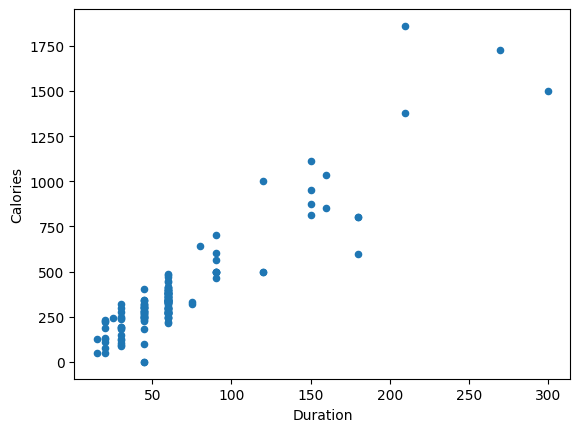

In [44]:
dfClean.plot(kind='scatter', x='Duration', y='Calories')

### Regressão Linear #####



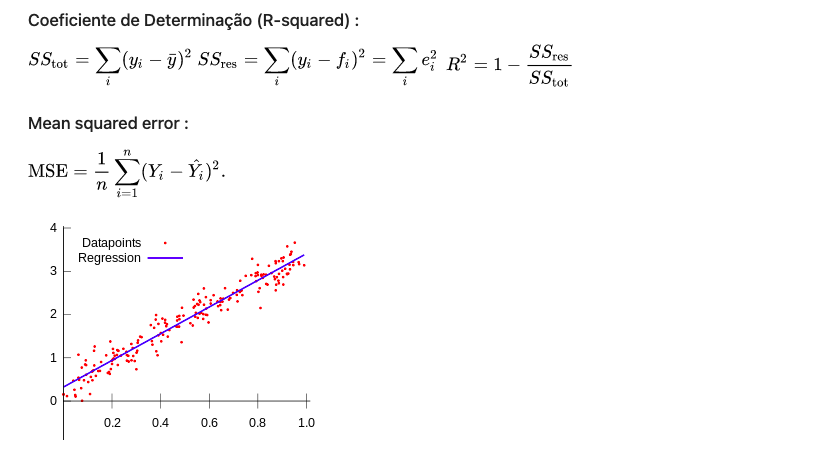

In [45]:
dfClean.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,374.005625
std,43.151882,14.711588,16.471618,270.421056
min,15.000000,80.000000,100.000000,0.000000
25%,45.000000,100.000000,124.000000,250.775000
50%,60.000000,105.500000,131.000000,320.700000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


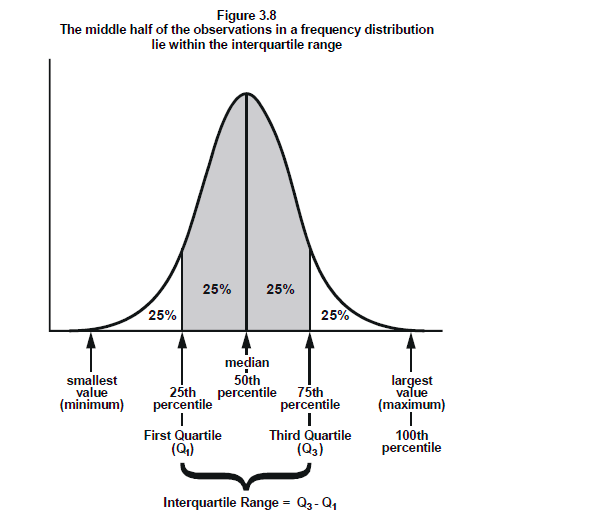

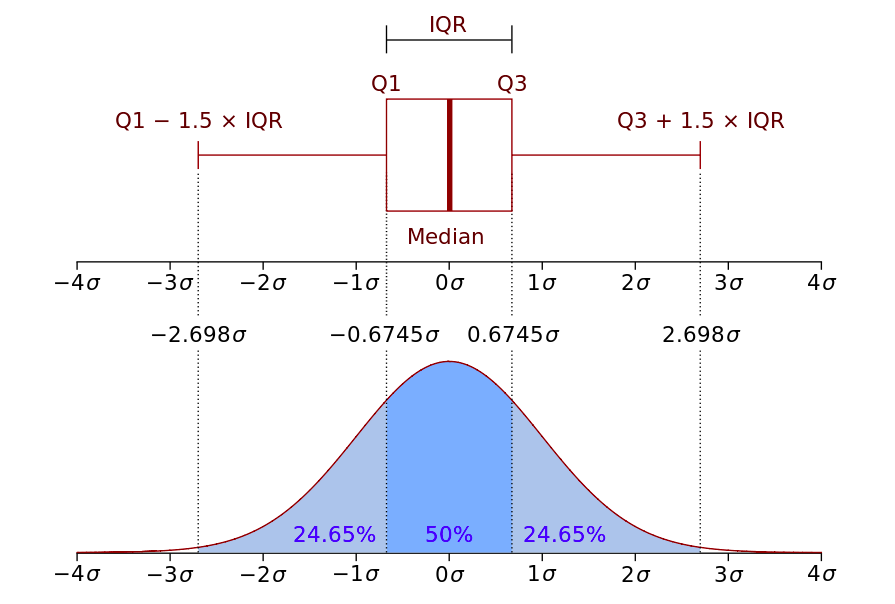

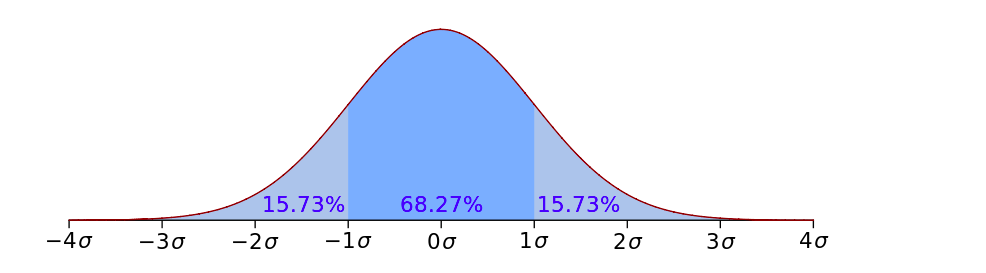

In [46]:
dfClean.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.162098,0.003578,0.918492
Pulse,-0.162098,1.000000,0.787035,0.027031
Maxpulse,0.003578,0.787035,1.000000,0.202811
Calories,0.918492,0.027031,0.202811,1.000000


In [47]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [48]:
### P-Values
from scipy import stats # biblioteca de estatistica
pearson_coef, p_value = stats.pearsonr(dfClean['Duration'], dfClean['Calories'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9184915847500769  with a P-value of P = 2.336784252595734e-66


<Axes: xlabel='Duration', ylabel='Calories'>

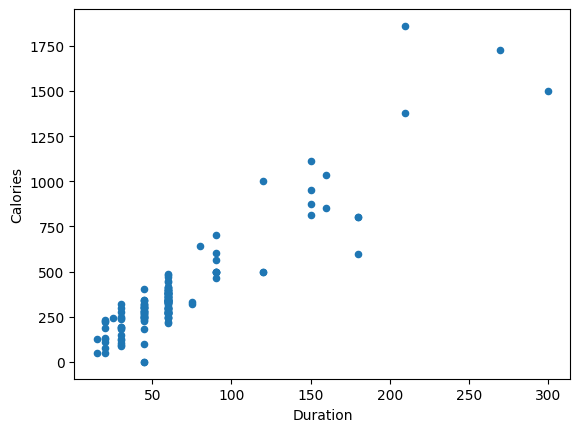

In [49]:
#### Visualizar Duration x Calories
dfClean.plot(kind='scatter', x='Duration', y='Calories')

In [50]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression() #chamando
lr

LinearRegression()

In [53]:
### Definir as Variáveis X e Y
X = dfClean[['Duration']]
Y = dfClean[['Calories']]

In [54]:
### Acha a reta que melhor descreve a distribuição dos dados # criando o modelo
lr.fit(X,Y)

LinearRegression()

$$
Yhat = a + b  X
$$

In [55]:
a = lr.intercept_
print(a)

[4.48876035]


In [56]:
b= lr.coef_
print(b)

[[5.75593578]]


In [57]:
### Usa o modelo para predição ####
Yhat = lr.predict(X)
Yhat[0:5]

array([[349.84490703],
       [349.84490703],
       [349.84490703],
       [263.50587036],
       [263.50587036]])

In [58]:
dfClean.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [59]:
### R-squared #####
print('The R-square is: ', lr.score(X, Y))

The R-square is:  0.8436267912567079


In [60]:
#### MSE - Mean Squared Error ####
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse) # o valor está muito alto, dai teria q testar outro modelo e assim comparar,oq estiver menor é melhor

The mean square error of Calories and predicted value is:  11364.601672333943


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='Duration', ylabel='Calories'>

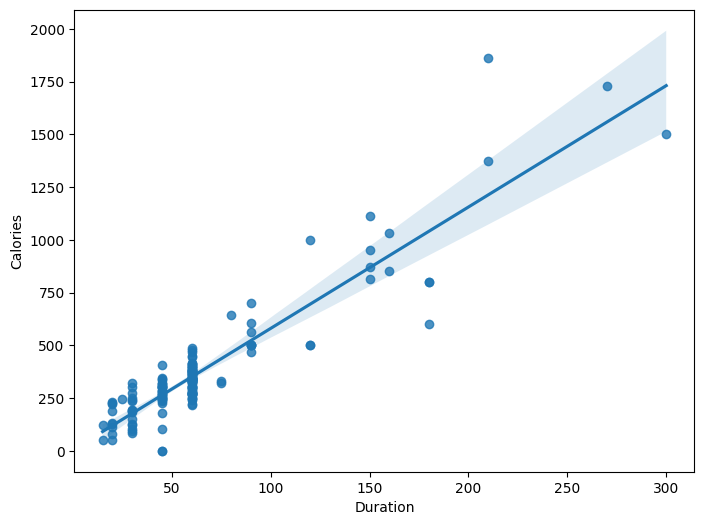

In [62]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="Duration", y="Calories", data=dfClean)


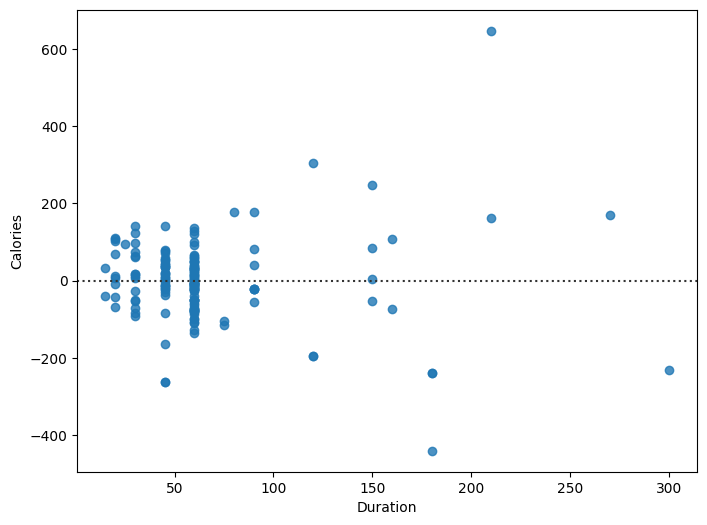

In [63]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.residplot(x=dfClean['Duration'],y=dfClean['Calories'])
plt.show()

<h4>Multiple Linear Regression</h4>

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$



$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [64]:
dfClean

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
157,60,105,140,290.8
158,60,110,145,300.0
159,60,115,145,310.2
160,75,120,150,320.4


In [65]:
Xm = dfClean[['Duration','Pulse', 'Maxpulse']]
Y = dfClean[['Calories']]

In [66]:
lr.fit(Xm,Y)

LinearRegression()

In [67]:
Yhat = lr.predict(Xm)

In [68]:
### R-squared #####
print('The R-square is: ', lr.score(Xm, Y))

The R-square is:  0.884433853336795


In [69]:
#### MSE - Mean Squared Error ####
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  8398.901795191232


<h4>Polynomial Regression</h4>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

In [70]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [71]:
a = np.array([2, 3 ,4]).reshape(-1,1)

In [72]:
a

array([[2],
       [3],
       [4]])

In [73]:
a.shape

(3, 1)

In [74]:
p = PolynomialFeatures(degree=2)

In [75]:
p.fit(a)

PolynomialFeatures()

In [76]:
p.transform(a)

array([[ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [77]:
X = dfClean[['Duration']]
poly = PolynomialFeatures(degree=2)
X_T = poly.fit_transform(X)
X_T[0:5]


array([[1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 4.500e+01, 2.025e+03]])

In [78]:
Y = dfClean[['Calories']]
lr.fit(X_T,Y)

LinearRegression()

In [79]:
lr.coef_

array([[0.00000000e+00, 5.45401367e+00, 1.22029982e-03]])

In [80]:
Yhat = lr.predict(X_T)
Yhat[0:5]

array([[348.2177887 ],
       [348.2177887 ],
       [348.2177887 ],
       [264.48561148],
       [264.48561148]])

In [81]:
### R-squared #####
print('The R-square is: ', lr.score(X_T, Y))

The R-square is:  0.8438822847171648


In [82]:
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#%matplotlib inline

In [83]:
x=np.arange(-10,11,0.1)

In [84]:
y = 1*(x**2) + 1*x + 3

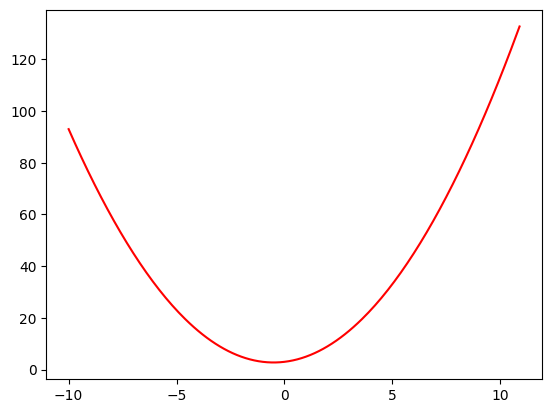

In [85]:
plt.plot(x,y,'r')

In [86]:
y_noise = 5 * np.random.normal(size=x.size)

In [87]:
ydata = y + y_noise

Text(0.5, 0, 'Independent Variable')

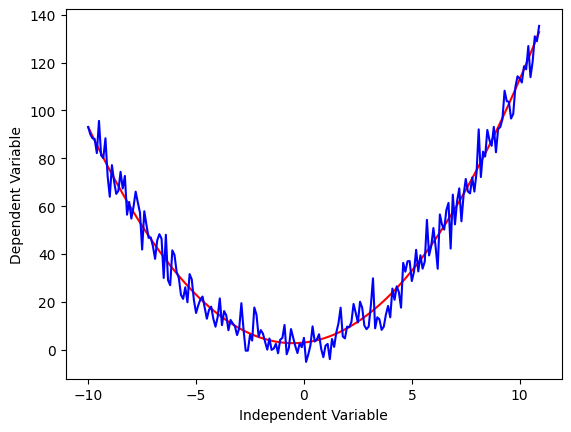

In [88]:
plt.plot(x,y,'r')
plt.plot(x,ydata,'b')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
#plt.show()

In [89]:
pearson_coef, p_value = stats.pearsonr(x, y)
print("The Pearson Correlation Coefficient (x,y) without noise is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient (x,y) without noise is 0.33071080271226755  with a P-value of P = 9.462588289130443e-07


In [90]:
pearson_coef, p_value = stats.pearsonr(x, ydata)
print("The Pearson Correlation Coefficient (x,ydata) with noise is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient (x,ydata) with noise is 0.3162936483329399  with a P-value of P = 2.913887668832042e-06


In [91]:
from sklearn.model_selection import train_test_split # biblioteca para treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, ydata, test_size=0.30, random_state=0)

In [92]:
x.shape

(210,)

In [93]:
X_train.shape

(147,)

In [94]:
X_test.shape

(63,)

In [95]:
210*0.70

147.0

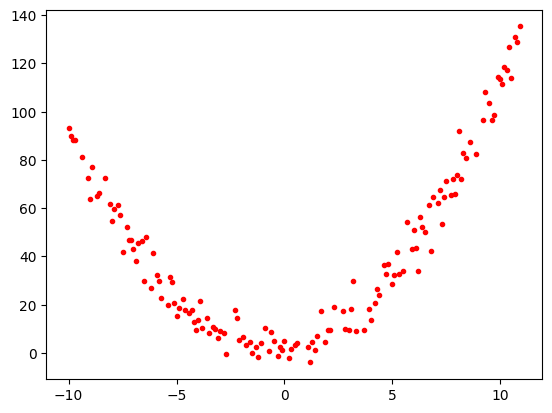

In [96]:
plt.plot(X_train,y_train,'.r')


In [97]:
y[0:5]

array([93.  , 91.11, 89.24, 87.39, 85.56])

In [98]:
x[0:5]

array([-10. ,  -9.9,  -9.8,  -9.7,  -9.6])

<h2><center> Regressão Linear - Usando a Transformação de X -- XT = (X,X^2, X^3,..,Xˆn)<h2>

In [99]:
X_train[0:5]

array([-3.9, -7.6, -7. , -4. , -4.4])

In [100]:
(-3.9)**2

15.209999999999999

In [101]:
# y = 1*(x**2) + 1*x + 3

In [102]:
poly = PolynomialFeatures(degree=2) # para criar o x² ( modelo de transformação dos dados )
#poly.fit(X_train)
#X_T = poly.transform(X_train)

X_T = poly.fit_transform(X_train.reshape(-1,1))
X_T[0:5]

array([[ 1.  , -3.9 , 15.21],
       [ 1.  , -7.6 , 57.76],
       [ 1.  , -7.  , 49.  ],
       [ 1.  , -4.  , 16.  ],
       [ 1.  , -4.4 , 19.36]])

In [103]:
#lr.fit(x.reshape(-1,1),y)
lr = LinearRegression()
lr.fit(X_T,y_train)

LinearRegression()

In [104]:
y_train[0:5]

array([21.44543216, 57.27938194, 43.25238009, 13.63808366, 16.6832826 ])

In [105]:
y_T = lr.predict(X_T)
y_T[0:5]

array([13.99462647, 52.57853543, 44.4707964 , 14.67919826, 17.61650571])

In [106]:
lr.score(X_T,y_train)

0.975777281547067

<h2><center> Regressão Não-Linear - Função Quadrática <h2>

In [107]:
def quadratic(x,a,b,c):
     y = a*(x**2) + b*x + c
     return y

In [108]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(quadratic, X_train, y_train)
#print the final parameters
print(" a = %f, b = %f, c = %f" % (popt[0], popt[1],popt[2]))

 a = 0.995102, b = 1.015585, c = 2.819912


In [109]:
# build the model using train set
#popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = quadratic(X_test, *popt)
y_hat

array([ 70.94343284,   4.76914864,  40.6856043 ,  82.97977477,
        88.81772203,   3.96926128,   6.99230698,   9.87048934,
         2.79942853,  37.32123037,  27.3360188 ,  39.71357075,
        20.87224568,  92.56340055,   2.57289398,   3.3484922 ,
       100.29358198,  35.91730997,  10.87029808,  61.40274755,
        58.68898097,  66.08353105,  79.44130977,  18.40058768,
         2.64430889,  17.77627345,  11.57825794,  10.98909971,
        42.18551926,  83.34846948,   6.50033487,  31.68866496,
        21.04839982,   8.24352043,  86.97473581,  27.5408492 ,
        68.01542152,   7.87209297,  64.50336786,  18.56445199,
        94.46609286,  55.44033133,   3.38536167,  23.71146594,
        84.77886031,   6.90627821,  19.37253257,  28.33902309,
        12.68518905,   4.26924427,  49.79634761,   2.93142105,
        52.86939457, 108.34219591,  77.70193032,  32.55006054,
         4.53997   ,  12.1873182 ,  14.13391118,   4.83059776,
       125.39472128,   4.01842057,   6.11429356])

In [110]:
print("Residual sum of squares (MSE): %f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: " , r2_score(y_test,y_hat) )

Residual sum of squares (MSE): 31.169294
R2-score:  0.9743761630849965


In [111]:
y_test

array([ 7.03369534e+01,  8.19261905e+00,  4.82941696e+01,  9.56301389e+01,
        9.31333199e+01,  4.66428718e-02,  1.10408800e+01,  1.15908808e+01,
        4.94770951e+00,  3.94778255e+01,  2.60831397e+01,  3.68308447e+01,
        2.10580403e+01,  9.22427882e+01,  1.51938761e+00,  4.76983330e-01,
        1.03874538e+02,  2.91117215e+01,  1.24418255e+01,  5.64400471e+01,
        5.23957802e+01,  7.43551396e+01,  8.00912592e+01,  1.29603206e+01,
       -1.89005969e+00,  1.35570594e+01,  1.13904689e+01,  1.54013217e+01,
        3.94146085e+01,  9.18202170e+01,  6.16894427e+00,  3.70620980e+01,
        1.47513492e+01,  1.94577029e+01,  8.52055392e+01,  1.75939776e+01,
        6.61018455e+01,  5.54597667e+00,  6.73815363e+01,  1.26960576e+01,
        9.30395042e+01,  6.60568811e+01,  9.76855606e+00,  2.55673550e+01,
        8.21605925e+01, -3.75457985e-01,  8.29902087e+00,  2.12607852e+01,
        1.61632278e+01,  3.24973241e-01,  5.78794114e+01, -5.08401249e+00,
        5.83222396e+01,  

<h2> A transformação funciona para f(x)  Polinomiais - E para outras funções não-lineares ??? </h2>

In [112]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [113]:
x=np.arange(-10,10,0.1)
Y = sigmoid(x,1,1)

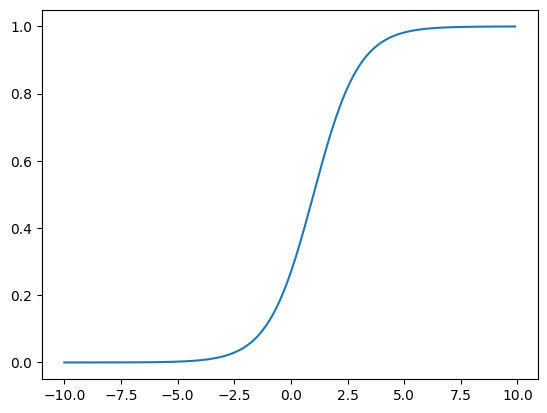

In [114]:
plt.plot(x,Y)

<h3> Por que às vezes (ou quase sempre) preciso normalizar os dados de entrada de uma ML ? </h3>

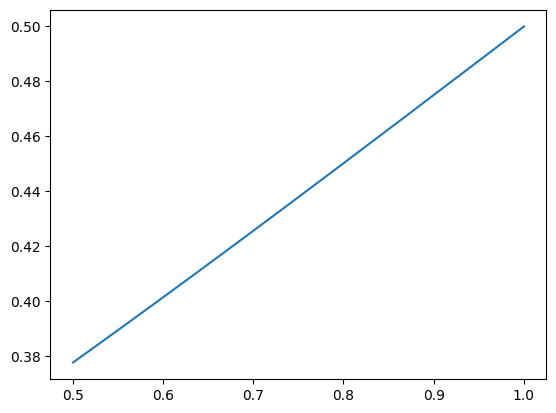

In [115]:
x=np.arange(50,100,0.1)
x=x/np.max(x) # dividir pelo valor max
Y = sigmoid(x,1,1)
plt.plot(x,Y)
#normalizar para padronizar mais os daddos


<h3>  <center>O que está ERRADO ????

      Dados de entrada precisam ser normalizados !!!!
</h3>


In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x.reshape(-1,1)))
xT = scaler.transform(x.reshape(-1,1))
#xT = x/np.max(x)

StandardScaler()


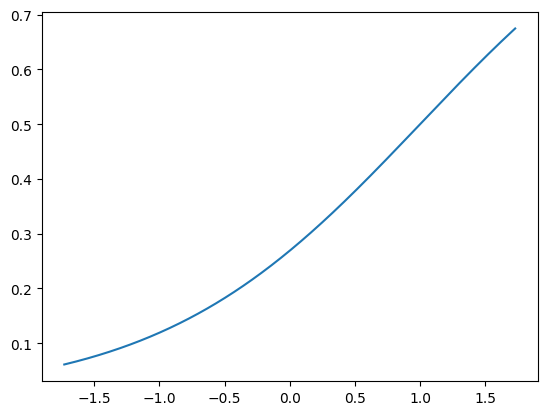

In [117]:
Y = sigmoid(xT,1,1)
plt.plot(xT,Y)

<h3>  <center> Vetor de entrada composto por N Features
          
      com ranges diferentes também será necessário a
    
            Normalização !!!!
 </h3>

### Conjunto Treino e Teste

In [118]:
X = dfClean[['Duration']]
y = dfClean[['Calories']]

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)

In [120]:
X_train

,Duration
1,60
67,90
98,90
19,45
99,30
...,...
113,60
64,20
15,60
125,60


In [121]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

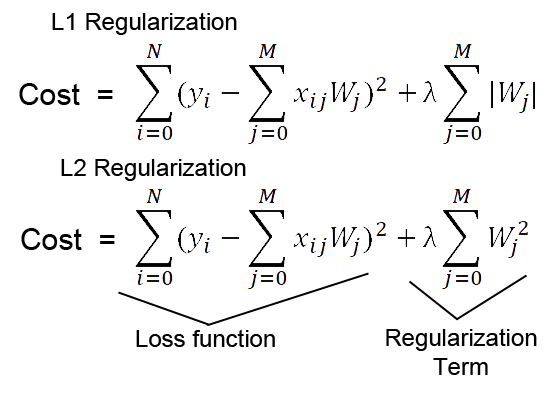

### Overfitting

c:\Users\laiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.38446e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\laiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.7802e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\laiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.21427e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\laiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.7031e-36): result may not be accurate.
  return linalg.solve(A

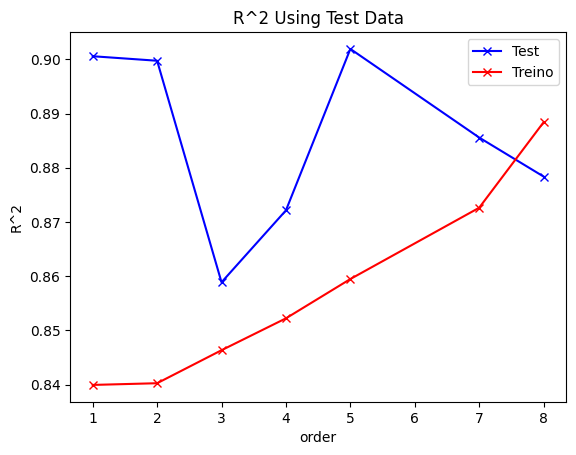

In [122]:
Rsqu_test = []
Rsqu_model =[]

order = [1,2,3,4,5,7,8]
for n in order:


    modelPipeline = Pipeline([('poly', PolynomialFeatures(degree=n)),('ridge', Ridge(alpha=0.1))])

    modelPipeline.fit(X_train,y_train)
    y_pred = modelPipeline.predict(X_test)


    Rsqu_test.append(modelPipeline.score(X_test,y_test))
    Rsqu_model.append(modelPipeline.score(X_train, y_train))


plt.plot(order, Rsqu_test,'b-x')
plt.plot(order, Rsqu_model,'r-x')
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.legend(('Test', 'Treino'))


In [123]:
#df = pd.read_csv('https://raw.githubusercontent.com/CharlesPrado23/BCDataScience1T22N/main/Regressao_Linear/weatherHistory.csv')

In [124]:
#df